# Foundations of AI & ML
## Session 05
### Experiment 1 - Part 3
## "Sequential" Gradient Descent

**Objectives:** We will use single sample(Sequential) Gradient Descent Method in this Experiment and see the variations when each and every single point is used instead of the Batch.

**Expected Time:** This Experiment should take around 15 mins

In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stat
%matplotlib notebook
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
import time

### Read the data:

In [2]:
data = pd.read_csv("../Datasets/regr01.txt", sep=" ", header=None, names=['l', 't'])
#print(data.head())
#print(data.tail()) 
#data = shuffle(data)
#data

In [3]:
l = data['l'].values
t = data['t'].values
tsq = t * t

In [4]:
l.shape

(90,)

### Single sample - Sequential

Now we will calculate the essenial parts of the Gradient Descent method
using each and every single point.

$y = mx + c$

$E$ = $(y_i - y)^2$

$\frac{\partial E }{\partial m}$ = $ -(y_i - (mx_i + c)) * x_i$

$\frac{\partial E }{\partial c}$ = $ -(y_i - (mx_i + c))$

In [5]:
def train(x, y, m, c, eta):
    ycalc = m * x + c
    error = (y - ycalc) ** 2
    delta_m = -(y - ycalc) * x
    delta_c = -(y - ycalc)
    m = m - delta_m * eta
    c = c - delta_c * eta
    return m, c, error

def train_per_sample(x,y,m,c,eta):
    for x_sample, y_sample in zip(x, y):
        m, c, e = train(x_sample, y_sample, m, c,eta)
        #print(m,c,e)
    return m, c, e

def train_sequential(x, y, m, c, eta, iterations=1000):
    for iteration in range(iterations):
        m, c, err = train_per_sample(x, y, m, c, eta)
    return m, c, err

Let us visualize the training in this case:

### $\eta$ = 0.001

In [6]:
# Initializing m and c to 0
m, c = 0, 0

In [7]:
# Fixing learning rate
lr = 0.001

<IPython.core.display.Javascript object>


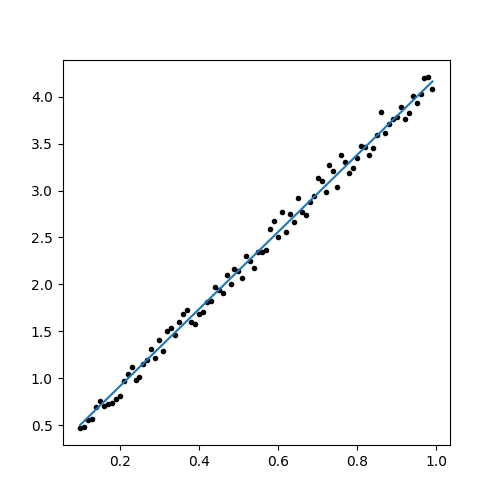

m = 2.20074 c = 1.20595 Error = 0.493884
m = 2.91952 c = 0.786544 Error = 0.1681
m = 3.372 c = 0.522514 Error = 0.0509451
m = 3.65685 c = 0.356302 Error = 0.0120332
m = 3.83616 c = 0.251668 Error = 0.00134416
m = 3.94904 c = 0.185799 Error = 8.67325e-05
m = 4.02011 c = 0.144333 Error = 0.0014635
m = 4.06484 c = 0.11823 Error = 0.0031895
m = 4.093 c = 0.101797 Error = 0.00461658
m = 4.11073 c = 0.0914527 Error = 0.00564991


In [8]:
# Training for 1000 iterations, plotting after every 100 iterations:
fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(111)
plt.ion()
fig.show()
fig.canvas.draw()

for num in range(10):
    m, c, error = train_sequential(l, tsq, m, c, lr, iterations=100)
    print("m = {0:.6} c = {1:.6} Error = {2:.6}".format(m, c, error))
    y = m * l + c
    ax.clear()
    ax.plot(l, tsq, '.k')
    ax.plot(l, y)
    fig.canvas.draw()
    time.sleep(1)

**Exercise: Experiment with more iterations**

## Plotting error vs iterations

<IPython.core.display.Javascript object>


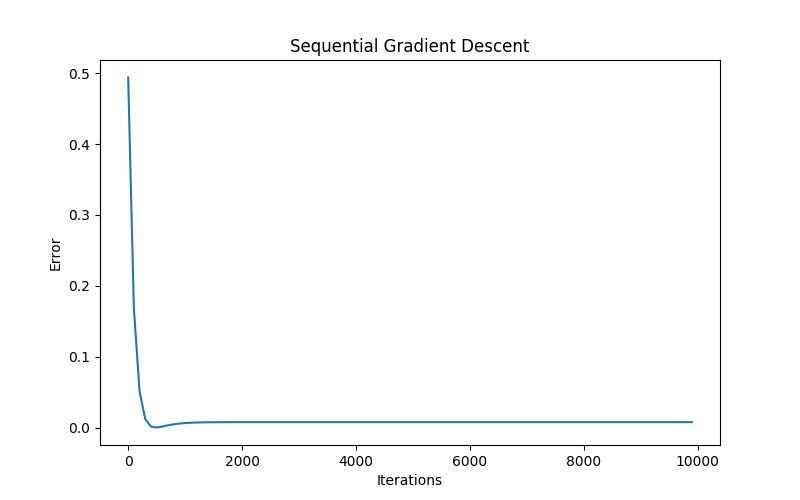

In [9]:
ms, cs,errs = [], [], []
m, c = 0, 0
lr = 0.001
for times in range(100):
    m, c, error = train_sequential(l, tsq, m, c, lr, iterations=100) # We will plot the value of for every 100 iterations
    ms.append(m)
    cs.append(c)
    errs.append(error)
epochs = range(0, 10000, 100)
plt.figure(figsize=(8, 5))
plt.plot(epochs, errs)
plt.xlabel("Iterations")
plt.ylabel("Error")
plt.title("Sequential Gradient Descent")
plt.show()

**Exercise: Is this better than vanilla gradient descent?**

Hint: Check the error value at saturation, and the number of iterations it takes to reach saturation.

#### Last Error at saturation: 0.007
Yes, this is better than Vanilla GD as it was .01 at 20k iterations and .07 at 10k iterations.

Whereas, Sequential GD is .007 in 10k iterations i.e. 10 times better!